# Convolutional Neural Networks (CNN)

## Table of Contents

1. [Convolution](#first-bullet)
    * [1D Convolution](#first-bullet1)
    * [Properties](#first-bullet2)
    * [2D Convolution](#first-bullet3)
2. [CNN Architecture](#second-bullet)
3. [The Convolution Module](#third-bullet)
4. [Code - CNN for MNIST Classification](#fourth-bullet)
5. Code - CNN for CIFAR-10 Classification

# 1. Convolution <a class="anchor" id="first-bullet"></a>

## 1.1 1D Convolution <a class="anchor" id="first-bullet1"></a>

* Convolution equation: 
  $$
  (A * w)_{ij} = \sum_{i'=0}^{K-1}\sum_{j'=0}^{K-1}A(i - i', j-j')w(i',j')
  $$
* Cross Correlation (in CNN)
  $$
  (A * w)_{ij} = \sum_{i'=0}^{K-1}\sum_{j'=0}^{K-1}A(i + i', j+j')w(i',j')
  $$
* Modes (input length = N, kernel length = K)
  * valid convolution (commonly used): "output size" = N-K+1
  * Same convolution (commonly used): "output size" = N
  * full convolution: "output size" = N + K - 1

* 1D convolution
  * Input image: $a=[a_1, a_2, a_3, a_4]$.
  * Filter: $w = [w_1, w_2]$.
  * Output image: $b = a*w=[a_1 w_1 + a_2 w_2, a_2 w_1 + a_3w_2, a_3 w_1 + a_4 w_2]$
  * In general, $b_i = \sum^K_{i'=1} a_{i+i'} w_{i'}$.
  * Equivalent matrix multiplication:
  $$
  \begin{pmatrix}a_1w_1 + a_2w_2 \\ a_2w_1 + a_3w_2 \\ a_3w_1 + a_4w_2 \end{pmatrix} = \begin{pmatrix}w_1 & w_2 & 0 & 0 \\ 0 & w_1 & w_2 &  0  \\0 & 0 & w_1 & w_2  \end{pmatrix} \begin{pmatrix}a_1 \\ a_2 \\ a_3 \\ a_4 \end{pmatrix}
  $$
  but it takes up too much space to store and time to compute.

## 1.2 Properties <a class="anchor" id="first-bullet2"></a>

* Parameter sharing / weight sharing of convolution (Why?)
  * Fully connected ANN.
  * MNIST: $28 \times 28 = 784$ sized input vector.
  * CIFAR-10: $32 \times 32 \times 3 = 3072$ sized input vector.
  * VGG (a modern CNN) looks at images of size $224 \times 224$ = 150528 features.
  * HD image: $1280 \times 720$ = 2.8 million features.

* Translational Invariance
  * Convolution is a pattern finder / filter.
  * We want the filter to look at all locations in the image. 
  * It's better to have a shared pattern finder because this pattern finder looks at all locations on the image and it doesn't need to learn the weights to look at at every single possible point.

* How much do we save by weight sharing?
  * Convolution layer:
    * Suppose we use a valid mode of convolution.
    * Input image : $32 \times 32 \times 3$.
    * Filter: $3 \times 5\times 5\times 64$.
    * Output image: $28 \times 28 \times 64 (32-5+1=28)$.
    * The total number of parameters (ignoring bias terms) $= 3 \times 5 \times 5\times 64 = 4800$.
  * Dense layer (full matrix multiplication)
    * Flattened input image: $32 \times 32 \times 3 = 3072$.
    * Flattened output vector: $28 \times 28 \times 64 = 50176$.
    * Weight matrix: $3072 \times 50176 = 154,140,672 \sim 154$ million.
    * We have more parameters. Without shared weights, we need to learn to find the pattern in every possible location it might appear, separately.
  
* How are convolution filters found?
  * Convolution = image modifier (e.g. blur, edge detection).
  * Convolution = pattern finder / share-parameter matrix multiplication / feature transformer. 

## 1.3 2D Convolution <a class="anchor" id="first-bullet3"></a>
* 2D grayscale pattern finder
  $$
  (A*w)_{ij} = \sum^K_{i'=1} \sum^K_{j'=1} A(i + i', j+ j')w(i', j')
  $$
* 3D color pattern finder
  $$
  (A*w)_{ij} = \sum^3_{c=1} \sum^K_{i'=1} \sum^K_{j'=1} A(i + i', j+ j',c)w(i', j',c)
  $$
* 3D convolution
  * Input image: $H \times W \times 3$
  * Kernel: $K \times K \times 3$
  * Output image: $(H-K+1) \times (W-K+1)$
  * This should offend your sensibilities 
* Convolution in a Deep Neural Network
  * $B = A * w$
  * shape$(A) = H \times W \times C1$
  * shape$(w) = C1 \times K \times K \times C2$
  * shape$(B) = H \times W \times C2$
  * $B(i,j,c) = \sum^K_{i'=1} \sum^K_{j'=1} \sum^{C1}_{c'=1}A(i+i', j+j', c')w(c',i',j',c)$



---

# 2. CNN Architecture <a class="anchor" id="second-bullet"></a>

* Stage 1: a series of convolution layers and pooling layers.
  * Convolution layer:
    * Conv layer: $\sigma(W * x + b)$; Dense layer: $\sigma(W^Tx + b)$
    * In both layers, we have bias term and activation function.
    * In a Dense layer, if $W^Tx$ is a vector of size $M$, $b$ is also a vector of size $M$.
    * In a Conv layer, $b$ does not have the same shape as $W*x$. Although this violates the rules of matrix arithmetic, but the rules of broadcasting in Numpy allow it. Broadcasting allows the same bias term applies to every pixel for each feature map.
  * Pooling layer:
    * Pooling is downsampling. Types are Max pooling and average pooling.
    * Why pooling? translational invariance.
    * Different pool sizes: $2\times 3$ or $3 \times 2$. Different strides: pool can overlap.
    * Why pooling after convolution? 
      * After each "conv-pool" the image shrinks, but filter sizes generally stay the same. (Common filter sizes: $3\times 3, 5\times 5, 7 \times 7$.)
      * Since filters stay the same size, they find increasingly large patterns (relative to the image). So CNN can learn hierarchical feature.
    * Losing information?
      * Yes we lose spatial information since the image shrinks. But we care more about whether/how many times the feature was found, rather than where.
      * Actually the number of feature maps increases at each layer, so we gain information in terms of what features were found.
    * Handling different-sized images?
      * Problem:
        * Input image size = $32\times32$
        * 4 convolution with stride $2$: $32 \times 32$ > $16 \times 16$ > $8\times 8$ > $4\times4$ > $2\times 2$.
        * Input image size = $64\times64$
        * 4 convolution with stride $2$: $64 \times 64$ > $32 \times 32$ > $16 \times 16$ > $8\times 8$ > $4\times4$.
        * If final # feature maps $= 100$, then we would get
          * 400-D vector for a $32 \times 32$ image.
          * 1600-D vector for a $64 \times 64$ image.
      * Solution: Global max pooling.
        * We always get an output of $1\times 1 \times C$ regardless of $H$ and $W$.
  * Hyperparameters
    * Learning rate; hidden layers; hidden units per layer; etc.
    * With CNNs, conventions are:.
      * Small filters relative to image, e.g. $3\times 3, 5\times 5, 7 \times 7$.
      * Repeat: convolution -> pooling -> convolution -> pooling -> etc.
      * Increase # feature maps, e.g. $32$ -> $64$ -> $128$ -> $128$.
    * Stride is alternative to pooling. "strided conv" is alternative to "conv-pool".
* Stage 2: a series of dense layers.
  * Output of convolution is $H \times W \times C$ (# feature maps), but dense layer expects a 1D input vector.
  * In PyTorch: `x.view(-1, num_features)`
  * Different size of images can be handled by global max pool so that the vector sizes are the same for dense layer to process.

* Final activation / # of nodes:
  * Regression: none
  * Binary classifiaction: sigmoid
  * Multiclass classification: softmax


---

# 3. The Convolution Module <a class="anchor" id="third-bullet"></a>

* nn.Conv2d
  * Main parameter is the filter kernel ($ C1 \times H \times W \times C2$).
  * The number of channels AKA the number of feature maps.
  * Usually $H=W=K$(Kernel size, usually $K = 3$).
  * Usually odd
  * Stride: step size

    ```{Python}
    nn.Conv2d(in_channels = 1, out_channels=32, kernel_size=3, stride=2)
    ```

* Why Conv2d?
  * Although we have ($H\times W \times C$), but color is not a spatial dimension.
  * 1D convolution example: time series.
  * 3D convolution example: video (height, width, time); voxels (height, width, depth) - medical imaging data.

* Module Inheritance
  * nn.Module: the base class that all other modules inherit from
  * Examples of nn.Module: nn.Linear, nn.ReLU, nn.Sequential.

* Hierarchical Structure
  * model = nn.Linear() # a module
  * model = nn.Sequential(...) # a module of modules
  * ...... # module of modules of modules

* Dropout Regularization
  * Randomly drop nodes during training, so output not totally dependnet on any single input.
  * Usually between dense layers, but not convolutions.

* Convolutional Arithmetic
  * Given kernel size, input size, stride size, padding, calculate the output size after convolution
  * Tutorial: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
  * Example: dilation = 1; padding = 1; kernel_size = 3, stride = 2, H_in = 32

    H_out = floor$[(32 + 2\times1 - 1\times（3-1）-1)/2  +1]  = 16$

* Size convention of PyTorch library
  * $N \times C \times H \times W$ but not $N \times H \times W \times C$
  * torch vision hides this detail with transforms.ToTensor()
    * dataset.data: $N \times H \times W \times C$
    * yield: $N \times C \times H \times W$




---

# 4. Code - PyTorch CNN for MNIST Classification <a class="anchor" id="fourth-bullet"></a>
* Step 1. Load in the data
    * Fashion MNIST
    * $28 \times 28$ grayscale
    * Labels: t-shirt, shoes, pants, etc. 
* Step 2. Build the model
* Step 3. Train the model (more: data augmentation)
* Step 4. Evaluate the moel
* Step 5. Make predictions
  

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Load in train and test dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [9]:
# Look at the size of train dataset
display(train_dataset.data.max())
display(train_dataset.data.shape)
display(train_dataset.targets)

# Number of classes
K = len(set(train_dataset.targets.numpy()))
print("number of classes:", K)

tensor(255, dtype=torch.uint8)

torch.Size([60000, 28, 28])

tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
# Define the model
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
          nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2),
          nn.ReLU(),
          nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2),
          nn.ReLU(),
          nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
          nn.ReLU()
        )

        self.dense_layers = nn.Sequential(
          nn.Dropout(0.2),
          nn.Linear(128 * 2 * 2, 512),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(512, K)
        )
  
    def forward(self, X):
        out = self.conv_layers(X)
        out = out.view(out.size(0), -1)
        out = self.dense_layers(out)
        return out


In [13]:
# Instantiate the model
model = CNN(K)

In [14]:
# Move the model to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
  )
  (dense_layers): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [15]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [16]:
# Data loader - automatically generates batches in the training loop and takes care of shuffling
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [18]:
# A function to encapsulate the training loop
def training(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for ep in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # Move data to GPU
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward and optimize
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) 
    
    model.eval()
    test_loss = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[ep] = train_loss
    test_losses[ep] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {ep+1}/{epochs}: \
    \nTrain Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [19]:
# Training process
train_losses, test_losses = training(
    model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15,     
Train Loss: 0.6727, Test Loss: 0.5031, Duration: 0:00:14.791370
Epoch 2/15,     
Train Loss: 0.4464, Test Loss: 0.4058, Duration: 0:00:14.399935
Epoch 3/15,     
Train Loss: 0.3831, Test Loss: 0.3744, Duration: 0:00:14.387935
Epoch 4/15,     
Train Loss: 0.3508, Test Loss: 0.3401, Duration: 0:00:14.508885
Epoch 5/15,     
Train Loss: 0.3225, Test Loss: 0.3295, Duration: 0:00:14.465288
Epoch 6/15,     
Train Loss: 0.3010, Test Loss: 0.3130, Duration: 0:00:14.455688
Epoch 7/15,     
Train Loss: 0.2813, Test Loss: 0.3063, Duration: 0:00:14.495337
Epoch 8/15,     
Train Loss: 0.2646, Test Loss: 0.2918, Duration: 0:00:14.454773
Epoch 9/15,     
Train Loss: 0.2519, Test Loss: 0.2864, Duration: 0:00:14.462710
Epoch 10/15,     
Train Loss: 0.2346, Test Loss: 0.2891, Duration: 0:00:14.363290
Epoch 11/15,     
Train Loss: 0.2230, Test Loss: 0.2920, Duration: 0:00:14.325034
Epoch 12/15,     
Train Loss: 0.2107, Test Loss: 0.2878, Duration: 0:00:14.267239
Epoch 13/15,     
Train L

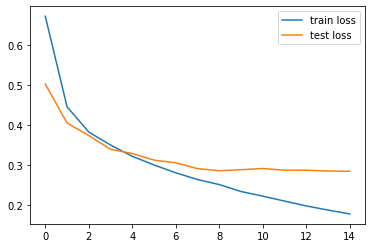

In [20]:
# Plot the train loss and test loss per epoch
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [21]:
# Train accuracy

model.eval()
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # Update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total


Train acc: 0.9493, Test acc: 0.9024


In [36]:
# Print and plot Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(18, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 18)
    plt.yticks(tick_marks, classes, fontsize = 18)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black",
               fontsize = 14)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 18)
    plt.xlabel('Predicted label', fontsize = 18)
    plt.show()

Train acc: 0.9493, Test acc: 0.9024
Confusion matrix, without normalization
[[856   3  23  17   4   1  92   0   4   0]
 [  1 979   1  10   3   0   5   0   1   0]
 [ 17   1 800  10 112   0  57   0   3   0]
 [ 10   4  12 908  36   0  29   0   1   0]
 [  0   0  18  14 910   0  58   0   0   0]
 [  0   0   0   1   0 958   0  26   2  13]
 [ 92   0  55  28 114   0 703   0   8   0]
 [  0   0   0   0   0   6   0 965   0  29]
 [  2   3   3   0   7   1   4   1 978   1]
 [  1   0   0   0   0   4   0  28   0 967]]


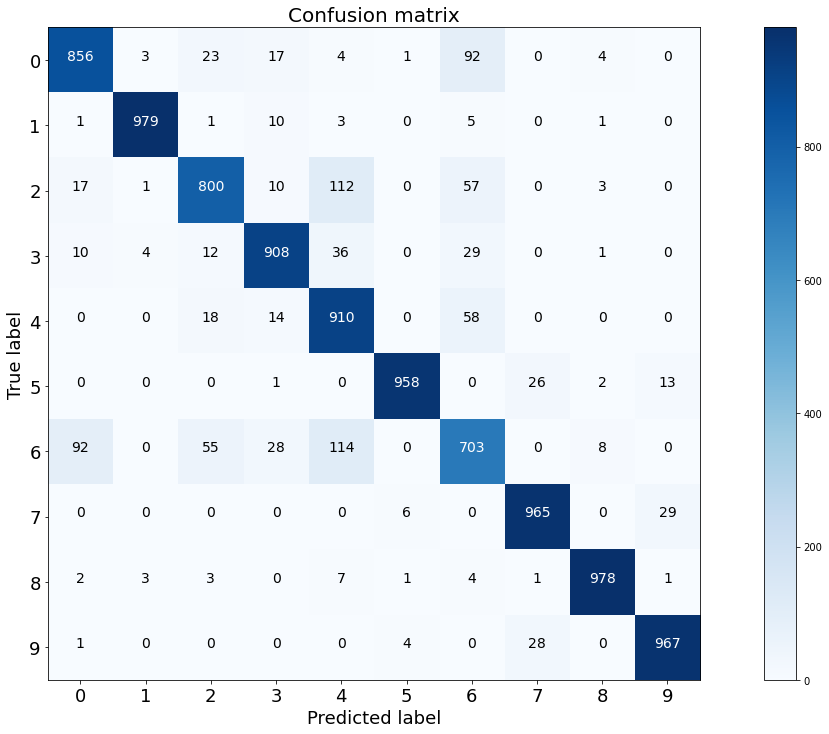

In [37]:
# Test accuracy

model.eval()
n_correct = 0.
n_total = 0.
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
    # Move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # Update p_test
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

    # Update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [39]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")
print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


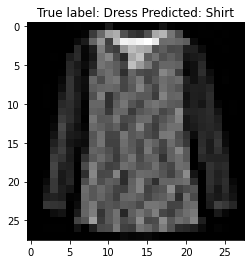

In [45]:
# Show some misclassified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title(f"True label: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}");